In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('mortality_by_latitude.csv')
print(data.head())

   latitude  mortality_index  temperature
0        50             1025         51.3
1        51             1045         49.9
2        52             1004         50.0
3        53              959         49.2
4        54              870         48.5


In [5]:
print(data.columns)

Index(['latitude', 'mortality_index', 'temperature'], dtype='object')


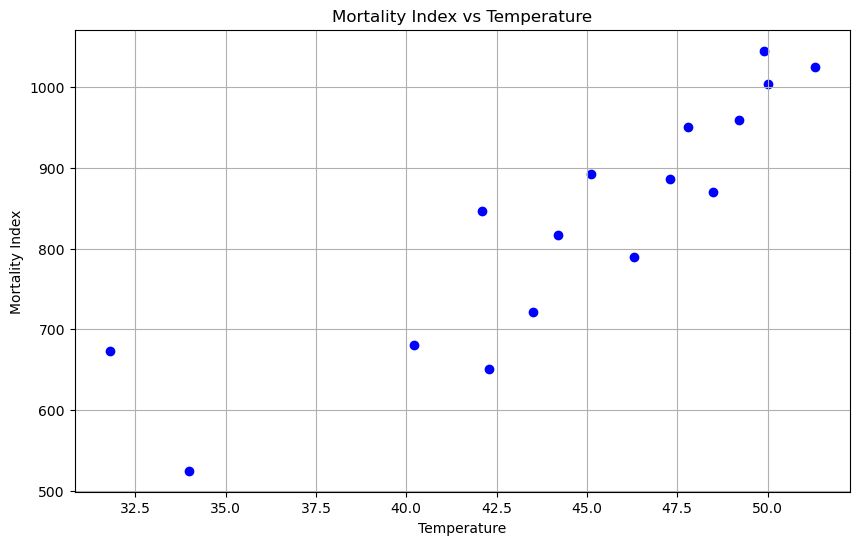

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['temperature'], data['mortality_index'], color='blue')
plt.xlabel('Temperature')
plt.ylabel('Mortality Index')
plt.title('Mortality Index vs Temperature')
plt.grid(True)
plt.show()

In [14]:
# Extracting columns
mortality_index = data['mortality_index']
temperature = data['temperature']

# Check correlation between variables
correlation = np.corrcoef(temperature, mortality_index)[0, 1]
print("Correlation between temperature and mortality index:", correlation)

Correlation between temperature and mortality index: 0.874854403517683


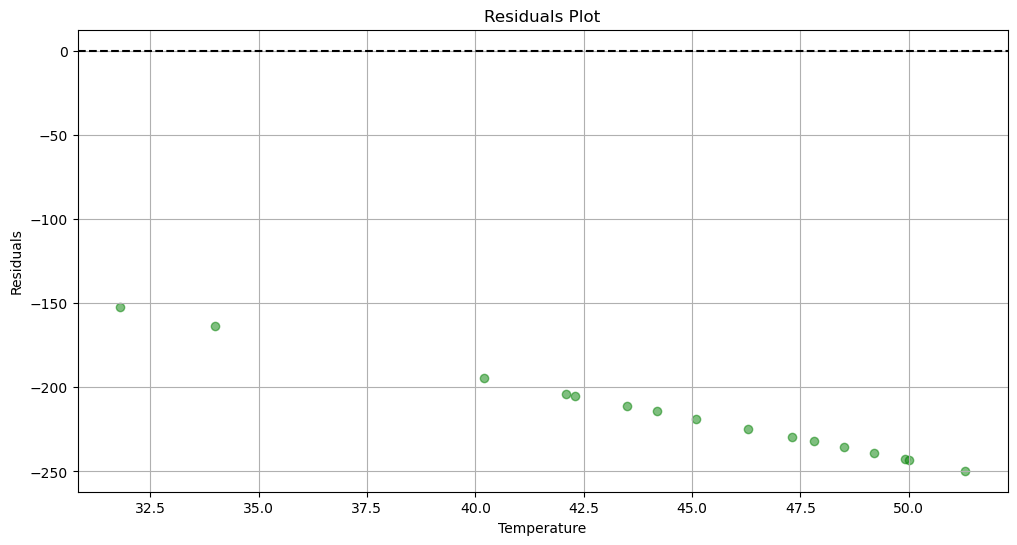

In [7]:
data['log_mortality_index'] = np.log(data['mortality_index'])
residuals = data['log_mortality_index'] - (5 * data['temperature'])  
plt.figure(figsize=(12, 6))
plt.scatter(data['temperature'], residuals, color='green', alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.show()

In [17]:
correlation2 = np.corrcoef(temperature, residuals)[0, 1]
print("Correlation between temperature and mortality index:", correlation2)

Correlation between temperature and mortality index: 0.8737145557466919


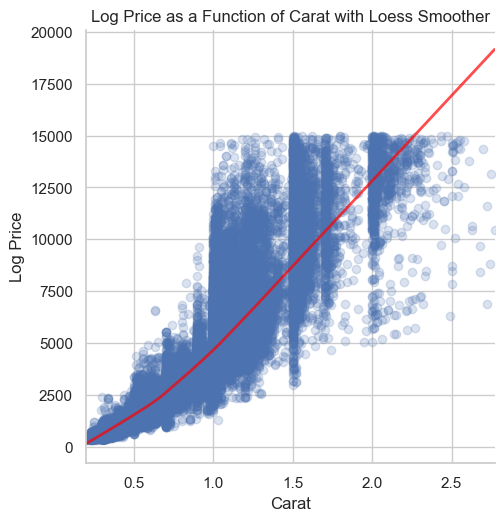

In [12]:
diamonds = sns.load_dataset('diamonds')
diamonds_subset = diamonds[(diamonds['carat'] < 3) & (diamonds['price'] < 15000)]

# Create the plot with log price as a function of carat with a loess smoother
sns.set(style="whitegrid")
sns.lmplot(x='carat', y='price', data=diamonds_subset, scatter_kws={'alpha':0.2}, line_kws={'color': 'red', 'linewidth': 2, 'alpha': 0.7, 'lw': 3}, lowess=True)
# Set axis labels and title
plt.xlabel('Carat')
plt.ylabel('Log Price')
plt.title('Log Price as a Function of Carat with Loess Smoother')

# Show the plot
plt.show()

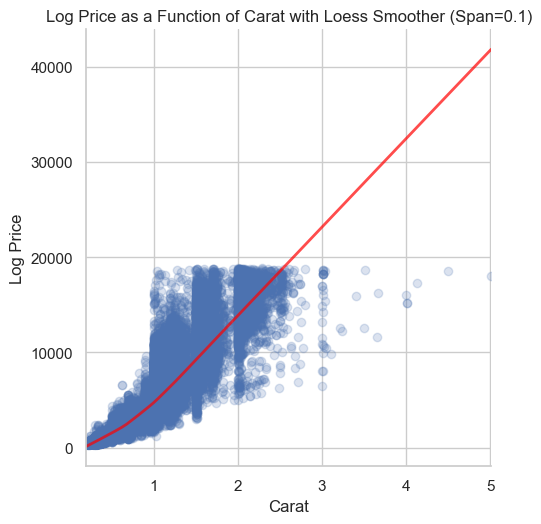

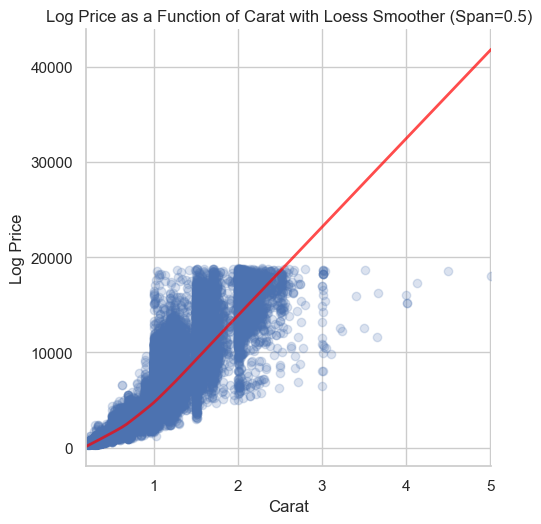

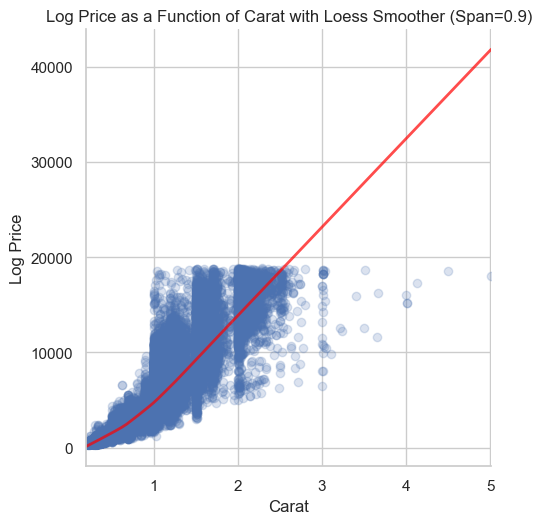

In [15]:
span_values = [0.1, 0.5, 0.9]

# Loop through span values and create plots
for span in span_values:
    # Create the plot with log price as a function of carat with a loess smoother
    sns.set(style="whitegrid")
    sns.lmplot(x='carat', y='price', data=diamonds, scatter_kws={'alpha':0.2}, 
               line_kws={'color': 'red', 'linewidth': 2, 'alpha': 0.7, 'lw': 3}, lowess=True, 
               scatter=True)
    
    # Set axis labels and title
    plt.xlabel('Carat')
    plt.ylabel('Log Price')
    plt.title(f'Log Price as a Function of Carat with Loess Smoother (Span={span})')
    
    # Show the plot
    plt.show()
    

In [16]:
print(residuals)

0     1005.311546
1     1025.449895
2      984.439885
3      939.520532
4      850.592181
5      930.664872
6      866.717449
7      872.955589
8      769.824290
9      827.299761
10     798.056376
11     703.136195
12     632.276065
13     662.530665
14     655.702669
15     507.368197
dtype: float64


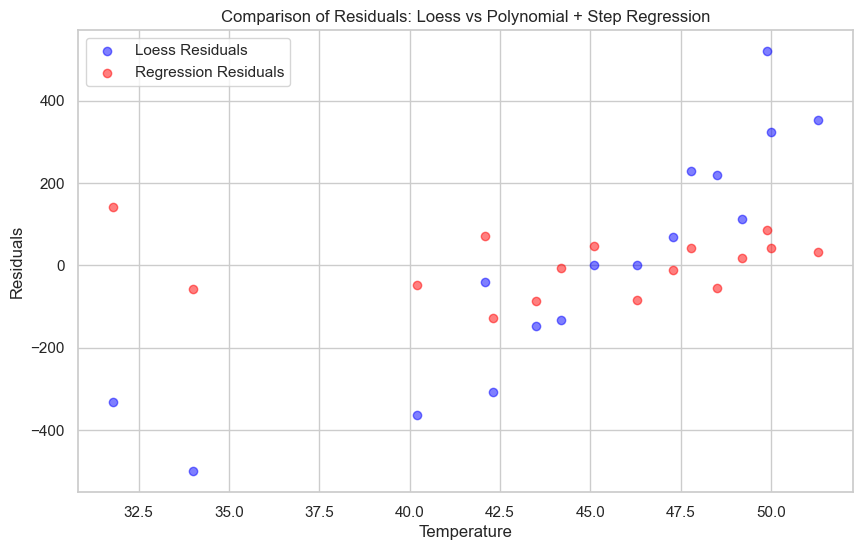

In [19]:
import statsmodels.api as sm

# Fit the loess smoother
lowess = sm.nonparametric.lowess
smoothed = lowess(data['mortality_index'], data['temperature'], frac=0.1)

# Fit the polynomial + step function regression
X = data['temperature']
X = sm.add_constant(X)
model = sm.OLS(data['mortality_index'], X)
results = model.fit()

# Calculate residuals
loess_residuals = data['mortality_index'] - smoothed[:, 1]
regression_residuals = results.resid

# Create a plot of the residuals for both models
plt.figure(figsize=(10, 6))
plt.scatter(data['temperature'], loess_residuals, label='Loess Residuals', color='blue', alpha=0.5)
plt.scatter(data['temperature'], regression_residuals, label='Regression Residuals', color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.title('Comparison of Residuals: Loess vs Polynomial + Step Regression')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()